In [3]:
import os
import cv2  
import numpy as np
import random
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import keras

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
imgs=[]
labels=[]
name=[]
c=0
folder=r'/home/runcandel/Desktop/pclubsectask/halfFace_A face covering mask dataset of South Asian people/Dataset1_Full Facial Image'
for fldr in os.listdir(folder):
    for file in os.listdir(os.path.join(folder,fldr)):
        # print(file)
        a=file.index('_')
        b=file.index('.')
        if file[a+1]=='1':
            img=cv2.imread(os.path.join(folder,fldr,file))
            img=cv2.resize(img,(224,224))
            if file[b-1]=='m':
                if c<40:
                    labels.append(0)
                    imgs.append(img)
                    name.append(file)
                    c+=1
            else:
                labels.append(1)
                imgs.append(img)
                name.append(file)
k=list(zip(imgs,labels,name))
random.shuffle(k)
imgs,labels,name = zip(*k)

In [24]:
print(len(imgs),len(labels),sum(labels),len(name))
print(labels)

77 77 37 77
(0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0)


2024-05-23 21:28:24.411476: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-23 21:28:25.594450: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [30]:
resnet = ResNet50(
    input_shape = [224,224,3], 
    weights = 'imagenet', 
    include_top = False    
)
for layer in resnet.layers:
    layer.trainable = False

In [31]:
x = Flatten() (resnet.output)
prediction = Dense(1, activation = 'sigmoid' , kernel_regularizer=keras.regularizers.l2(10))(x)
model = Model(inputs = resnet.input, outputs = prediction)
# model.summary()

In [33]:
model.compile (
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint_callback = ModelCheckpoint(filepath='best_model.keras', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    np.array(imgs),np.array(labels),epochs=20,validation_split=0.1,
    callbacks=[early_stopping_callback, checkpoint_callback]
)


Epoch 1/20


2024-05-22 20:11:09.236307: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-05-22 20:11:09.339772: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 106463232 exceeds 10% of free system memory.
2024-05-22 20:11:09.376803: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-05-22 20:11:09.475588: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-05-22 20:11:09.640351: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.


3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4886 - loss: 21.4341 - val_accuracy: 0.6250 - val_loss: 12.0164
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8187 - loss: 11.3600 - val_accuracy: 0.5000 - val_loss: 11.0822
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8717 - loss: 6.9474 - val_accuracy: 0.6250 - val_loss: 6.2205
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9286 - loss: 5.5702 - val_accuracy: 0.8750 - val_loss: 5.1148
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9888 - loss: 4.9281 - val_accuracy: 0.6250 - val_loss: 4.8562
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 4.0873 - val_accuracy: 0.5000 - val_loss: 5.4335
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 3.1238 - val_accuracy: 0.5000 - val_loss: 5.9632
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9593 - loss: 2.3586 - val_accuracy: 1.0000 - val_loss: 1.9590
Epoch 9/20
3/3 ━━━━━━━

In [5]:
modell=tf.keras.models.load_model('final_face.keras')

2024-05-23 21:28:57.876673: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-23 21:28:57.877339: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
testimgs=[]
for file in os.listdir(r'/home/runcandel/Desktop/pclubsectask/face test'):
    img=cv2.imread(os.path.join(r'/home/runcandel/Desktop/pclubsectask/face test',file))
    img=cv2.resize(img,(224,224))
    testimgs.append(img)
preds=modell.predict(np.array(testimgs))
    
            

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [12]:
len(preds)

16

In [13]:
hola=[]
for i in preds:
    if i >0.02:
        hola.append("female")
    else:
        hola.append("male")

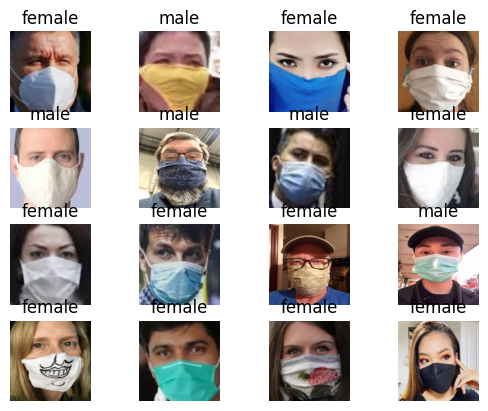

In [14]:
for i in range(len(testimgs)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(cv2.cvtColor(testimgs[i],cv2.COLOR_BGR2RGB))
    plt.title(hola[i]) 
    plt.axis('off')
plt.show()

In [57]:
model.save('final_face.keras')